In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

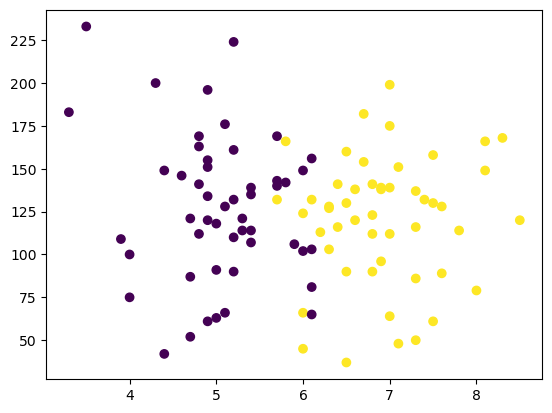

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
48,6.6,138.0
23,4.7,87.0
58,8.0,79.0
88,4.4,149.0
26,7.0,199.0
...,...,...
12,5.4,139.0
16,5.2,224.0
78,6.1,81.0
41,5.4,114.0


In [15]:
y_train

48    1
23    0
58    1
88    0
26    1
     ..
12    0
16    0
78    0
41    0
66    1
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,iq
33,6.0,149.0
7,5.0,63.0
35,6.8,90.0
91,7.5,158.0
13,6.4,116.0
24,4.7,121.0
80,4.9,196.0
39,4.6,146.0
87,5.7,132.0
8,6.1,156.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[ 0.50518014,  0.38542657],
       [-1.13713551, -0.88822928],
       [ 1.71530746, -1.08801843],
       [-1.39644851,  0.66013666],
       [ 0.8509308 ,  1.90881887],
       [ 0.07299181, -0.48865097],
       [-0.18632119,  0.48532115],
       [-0.79138485, -1.41267581],
       [-1.82863684, -0.33880911],
       [-0.27275886,  0.43537386],
       [-0.01344586,  0.03579556],
       [ 1.36955679,  0.13569013],
       [-0.27275886,  1.15960954],
       [-1.48288618,  1.93379251],
       [ 1.1102438 , -0.1639936 ],
       [-0.70494718, -0.81330835],
       [-0.70494718,  0.95982039],
       [-0.70494718,  0.23558471],
       [ 0.67805547, -0.26388817],
       [-2.34726283,  1.50924056],
       [-0.79138485,  1.33442505],
       [ 1.28311913,  0.18563742],
       [ 0.41874247, -0.81330835],
       [-0.87782252, -0.7883347 ],
       [ 0.8509308 , -1.46262309],
       [-1.05069785,  1.15960954],
       [-0.18632119,  1.08468861],
       [ 0.67805547,  0.46034751],
       [-0.87782252,

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[-0.01344586,  0.66013666],
       [-0.87782252, -1.48759674],
       [ 0.67805547, -0.81330835],
       [ 1.28311913,  0.88489946],
       [ 0.3323048 , -0.1639936 ],
       [-1.13713551, -0.03912538],
       [-0.96426018,  1.83389794],
       [-1.22357318,  0.58521573],
       [-0.27275886,  0.23558471],
       [ 0.07299181,  0.83495217]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

33    0
7     0
35    1
91    1
13    1
24    0
80    0
39    0
87    1
8     0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.7

In [30]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

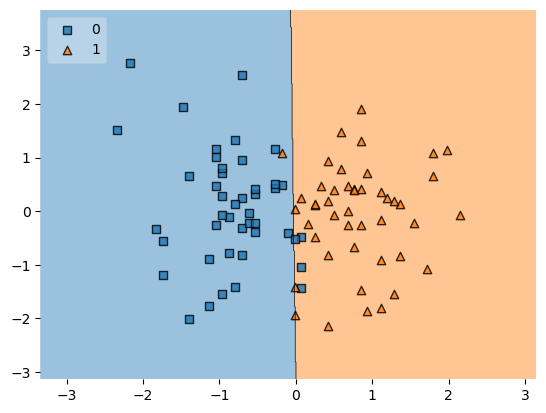

In [32]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [33]:
import pickle 

In [34]:
pickle.dump(clf,open('model.pkl','wb'))